In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

np.random.seed(42)

In [2]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [3]:
df.shape

(3829, 5)

In [5]:
# The total_days represents the total amount of time 
# each student has spent in classroom
# get the averages classroom time for control group
control_mean = df.query('group == "control"')['total_days'].mean()

#get the average classroom time for exp group
exp_mean = df.query('group == "experiment"')['total_days'].mean()

# display average classroom time for each group
control_mean, exp_mean

(73.36899038461539, 74.6715935334873)

In [8]:
#compute observed difference in classroom time 
obs_diff = control_mean - exp_mean
obs_diff

-1.3026031488719099

In [9]:
#create sampling distribution of difference in average classroom times 
# with bootstrapping 
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0],replace=True)
    control_mean = b_samp.query('group == "control"')['total_days'].mean()
    exp_mean = b_samp.query('group == "experiment"')['total_days'].mean()
    diffs.append(control_mean - exp_mean)

In [10]:
# convert to numpy array 
diffs = np.array(diffs)


(array([  22.,  159.,  759., 1887., 2966., 2587., 1241.,  332.,   42.,
           5.]),
 array([-3.97867587e+00, -3.40979018e+00, -2.84090448e+00, -2.27201878e+00,
        -1.70313309e+00, -1.13424739e+00, -5.65361693e-01,  3.52400341e-03,
         5.72409700e-01,  1.14129540e+00,  1.71018109e+00]),
 <BarContainer object of 10 artists>)

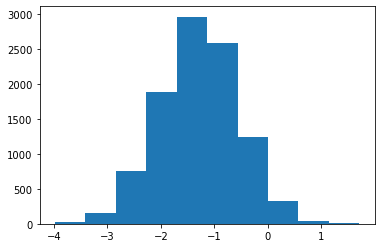

In [11]:
# plot sampling distribution 
plt.hist(diffs)

In [12]:
#simulate distribution under the null hypothesis 
null_vals = np.random.normal(0, diffs.std(), diffs.size)

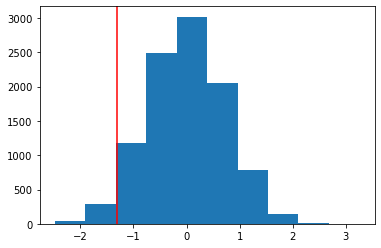

In [13]:
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red')


In [15]:
# compute p-value 
(null_vals < obs_diff).mean()

0.0349